In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm

Math = pd.read_csv("student-mat.csv", sep=";")
Portugese = pd.read_csv("student-por.csv", sep=";")

# Project Part 4

***Data Question #1***

    Is study time (studytime) a strong predictor of final grade (G3) in the math dataset?

**A) Describe the question you are asking and why it is interesting**

- What is your specific hypothesis?
  
   I want to explore whether students who study more each week tend to earn higher final grades (G3). My hypothesis is that higher studytime values are associated with higher average grades, since additional study hours should improve academic performance.
- How does it relate to the author research question or the question you came up with?

    This question aligns with the authors’ research, as Cortez & Silva investigated how sociodemographic and behavioral factors influence student achievement. Study time is one of these key behavioral variables, making it  relevant to their goal of predicting academic success.


**B) Describe how it connects to this data.**

Include:
- State which features you are using

   famsup (yes/no)
  G3 (numeric final grade)
- State how many observations there are for each feature
  
  Math dataset contains 395 observations (students) where both of the features (studytime and G3) have no no missing values.
- why this data is appropriate to answer this question (such as: Because there are a range of plants with different fruit lengths and different values of this genotype measured).:

    There are suitable levels variation for both studytime and G3 to examine the strength of relation between studytime and final grade performance. 

**C) Visualization**

- Describe what kind of plot you choose to make to get insight into this question and why this plot can help give insight. What do you expect to see? How will the result inform your hypothesis?

  To explore the relationship between studytime and final grade, I chose a displot with col = "studytime" to show how the distribution of G3 varies across the studytime categories. This plot is helpful because each studytime level gets its own panel, I can compare whether the distributions shift toward higher grades as studytime increases and it visually previews the trends I plan to test with a model.

  I expect that if studytime positively influences achievement, the distribution for higher studytime values should shift to the right (toward higher grades).
- Provide code to make the plot based on the data you loaded in Part 3. The code must work and must be explained so someone else can understand how it works

  Code is listed below
- Interpret the plot: how does the plot allow you to assess your hypothesis? What do you conclude by looking at this.

  This plot allows me to assess my hypothesis by showing how the distribution of final grades (G3) changes across different studytime categories.

  There is a slight upward shift in grades for students who study more, but the difference is not strong. Based on the plot alone, studytime appears to have only a weak relationship with final grade.
  


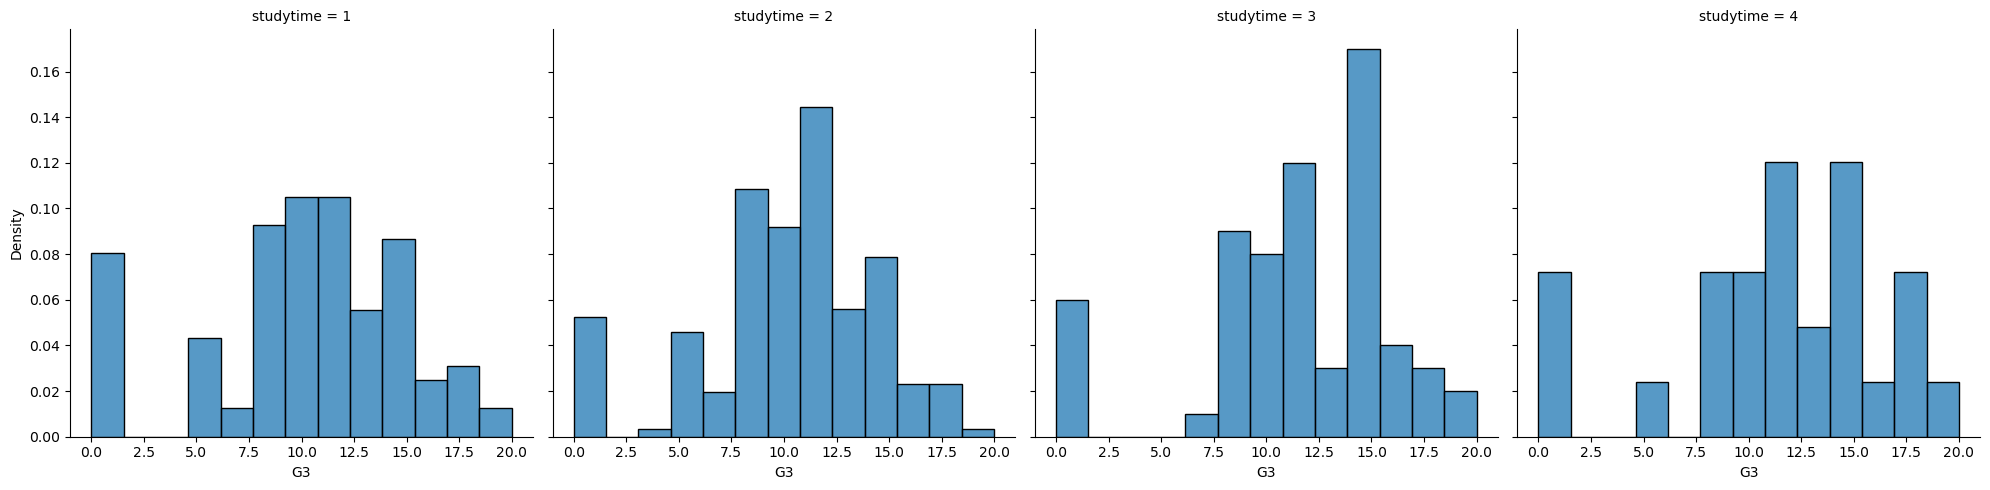

In [5]:
import seaborn as sns

sns.displot(data=Math, x="G3", col="studytime", stat="density", common_norm=False)

**D) Model**

- What feature(s) are you modeling and why is this model appropriate for that?

  I modeled final grade (G3) as the dependant variable because I want to better explain the dynmaics of academic achievement.
- What other feature(s) are used in the model, if any, and why are they included?

  The independent variable is studytime, because I want to investigate how well weekly study time predicts final academic performance.
  
- Describe what model you intend to make and why: how will this model inform your hypothesis. What kind of parameters do you expect for your model, based on your visualization?

    I will use a linear regression model with G3 predicted by studytime. This model quantifies how much grades change as studytime increases and tests the trend suggested by the plot. Based on the visualization, I expect a small positive slope, meaning grades should rise slightly with higher studytime.
- Provide code to run the model and view the numerical results. Again, the code should both work as written, and be explained.

  Code listed below
- Interpret the numerical results of the model: what can we conclude about the parameters of the model, and how certain/uncertain are we about them. Be specific. This should include a quantitative interpretation such as: For every 2 onions cut, subjects shed 1 teaspoon of tears. The confidence interval ranges from 0.5 to 1.5 teaspoons, suggesting the effect is not just due to chance.

  The model suggests a small positive relationship between studytime and grade, but the uncertainty is large enough that it is not possible to be fully confident that the effect is real.

    The intercept of 9.33 indicates that a student with the lowest studytime value is predicted to earn about a 9.33 in G3. The slope of 0.534 means each 1-unit increase in studytime raises the predicted grade by about 0.53 points. However, the 95% confidence interval (–0.005 to 1.073) includes zero, and the p-value (0.052) is slightly above 0.05, so this effect is weak and uncertain.

- What conclusions can we make about the research question based on the model results?

   Studytime appears to have a small and uncertain influence on final grade. The results do not provide strong evidence that higher studytime reliably leads to higher academic performance in this dataset.


In [13]:
X = Math["studytime"]
X = sm.add_constant(X)    
Y = Math["G3"]

Model1 = sm.OLS(Y, X).fit()
print(Model1.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.797
Date:                Tue, 09 Dec 2025   Prob (F-statistic):             0.0521
Time:                        11:55:52   Log-Likelihood:                -1159.3
No. Observations:                 395   AIC:                             2323.
Df Residuals:                     393   BIC:                             2331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3283      0.603     15.463      0.0

***Data Question #2***

    Do students who receive family educational support (famsup) have higher final grades (G3)?

**A) Describe the question you are asking and why it is interesting**

- What is your specific hypothesis?

  This question asks whether family educational support is linked to higher final grades. I hypothesize that students with family support (famsup = yes) will have slightly higher G3 scores than those without it. 
- How does it relate to the author research question or the question you came up with?

    This relates to my Part 2 focus on how parental and family background factors influence academic performance.

**B) Describe how it connects to this data.**

Include:
- State which features you are using

   famsup (yes/no)

  G3 (numeric final grade)
- State how many observations there are for each feature

  Both variables have 395 observations
- why this data is appropriate to answer this question (such as: Because there are a range of plants with different fruit lengths and different values of this genotype measured).:

    The dataset contains many students in both famsup = yes and famsup = no groups, allowing for the comparison of their grade distributions and fit a simple two-group model.

**C) Visualization**

- Describe what kind of plot you choose to make to get insight into this question and why this plot can help give insight. What do you expect to see? How will the result inform your hypothesis?

   A boxplot of G3 by famsup is useful because it shows the middle values and spread of grades for each group, making it easy to see whether one group tends to have higher grades than the other.
- Provide code to make the plot based on the data you loaded in Part 3. The code must work and must be explained so someone else can understand how it works
  Code listed below
- Interpret the plot: how does the plot allow you to assess your hypothesis? What do you conclude by looking at this.

  The boxplot shows very similar medians for yes and no groups, slightly different spreads and significant overlap of the distributions

    This suggests that family educational support may not strongly differentiate student achievement.

<Axes: xlabel='famsup', ylabel='G3'>

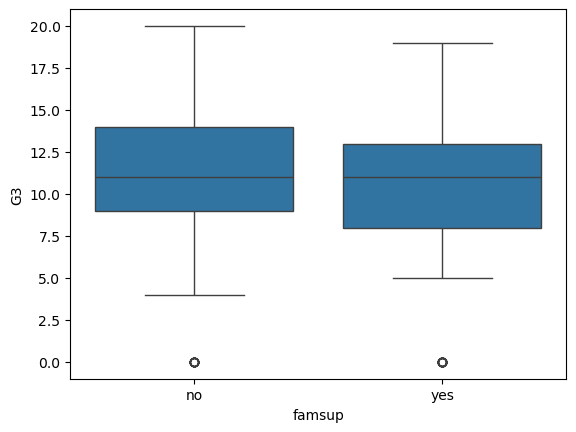

In [12]:
sns.boxplot(data=Math, x="famsup", y="G3")

**D) Model**

- What feature(s) are you modeling and why is this model appropriate for that?

  I am modeling final grade (g3) because it is the outcome I want to explain. A linear model is appropriate because G3 is numeric and I want to predict how it changes with family support.
- What other feature(s) are used in the model, if any, and why are they included?
    The independent variable is famsup, converted to a numeric variable (0 = no, 1 = yes). It is included to test whether students with family support tend to earn higher grades.
  
- Describe what model you intend to make and why: how will this model inform your hypothesis. What kind of parameters do you expect for your model, based on your visualization?

    I will use a simple linear regression of G3 on famsup. This model estimates the difference in average final grade between students with and without family support. Based on the boxplot, I expect the slope to be small because the two groups look similar.
- Provide code to run the model and view the numerical results. Again, the code should both work as written, and be explained.
  Code listed below
- Interpret the numerical results of the model: what can we conclude about the parameters of the model, and how certain/uncertain are we about them. Be specific. This should include a quantitative interpretation such as: For every 2 onions cut, subjects shed 1 teaspoon of tears. The confidence interval ranges from 0.5 to 1.5 teaspoons, suggesting the effect is not just due to chance.

    The intercept gives the predicted G3 for students without family support and the slope shows how much the predicted grade changes when a student has family support.

    The slope is very small, and its confidence interval includes zero, meaning the true effect could be negative or positive. The p-value is high, so the model does not provide evidence that family support changes grades.
- What conclusions can we make about the research question based on the model results?

  The model shows no meaningful difference in final grades between students with and without family educational support. This does not support the hypothesis that family support leads to higher academic performance.

In [15]:
Math["famsup_num"] = (Math["famsup"] == "yes").astype(int)

X2 = Math["famsup_num"]
X2 = sm.add_constant(X2)     
Y2 = Math["G3"]

Model2 = sm.OLS(Y2, X2).fit()

print(Model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6035
Date:                Tue, 09 Dec 2025   Prob (F-statistic):              0.438
Time:                        11:56:00   Log-Likelihood:                -1160.9
No. Observations:                 395   AIC:                             2326.
Df Residuals:                     393   BIC:                             2334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6405      0.371     28.714      0.0